**Persamaan differensial menggunakan Euler dan Rungekutta orde 4**

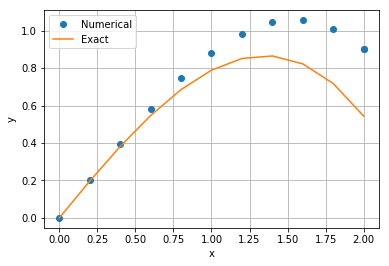

In [24]:
# Example 7.2, Hlm. 251
import numpy as np
from euler import *
import matplotlib.pyplot as plt
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F
x = 0.0 # Start of integration
xStop = 2.0 # End of integration
y = np.array([0.0, 1.0]) # Initial values of {y}
h = 0.2

A,B = integrate(F,x,y,xStop,h)
yExact = 100.0*A - 5.0*A**2 + 990.0*(np.exp(-0.1*A) - 1.0)
plt.plot(A,B[:,0],'o',A,yExact,'-')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(('Numerical','Exact'),loc=0)
plt.show()

In [1]:
# Example 7.4, Hlm. 257
import numpy as np
from printSoln import *
from run_kut4 import *
import matplotlib.pyplot as plt
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F
x = 0.0 # Start of integration
xStop = 2.0 # End of integration
y = np.array([0.0, 1.0]) # Initial values of {y}
h = 0.2

X,Y = integrate(F,x,y,xStop,h)
yExact = 100.0*X - 5.0*X**2 + 990.0*(np.exp(-0.1*X) - 1.0)
plt.plot(X,Y[:,0],'o',X,yExact,'-')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(('Numerical','Exact'),loc=0)
plt.show()

<Figure size 640x480 with 1 Axes>

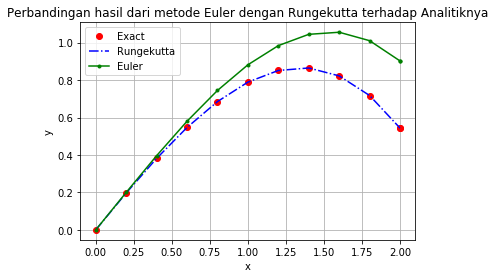

In [31]:
plt.title('Perbandingan hasil dari metode Euler dengan Rungekutta terhadap Analitiknya',size=12)
plt.plot(X,yExact,'or')
plt.plot(X,Y[:,0],'-.b')
plt.plot(A,B[:,0],'.-g')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(('Exact','Rungekutta','Euler'),loc=0)
plt.show()
# Ternyata metode rungekutta orde 4 lebih presisi hasilnya 
# Sama2 menggunakan h = 0.2

In [17]:
# Example 7.5, Hlm. 259
import numpy as np
from run_kut4 import *
from printSoln import *
from math import exp

def F(x,y):
    F = np.zeros(1)
    F[0] = 3.0*y[0] - 4.0*exp(-x) #Rumusnya
    return F
x = 0.0 # Start of integration
xStop = 10.0 # End of integration 
y = np.array([1.0]) # Initial values of {y}
h = 0.1 # Step size Harus mencoba2 h nya supaya mendapat yang benar
freq = 20 # Printout frequency Untuk mencetak hasil angkanya sesuai yang di kali dgn h

X,Y = integrate(F,x,y,xStop,h)

# Untuk mencetak nilai nya dibutuhkan fungsi printsoln
printSoln(X,Y,freq)


 x   y[ 0 ]  
   0.0000e+00    1.0000e+00 
   2.0000e+00    1.3250e-01 
   4.0000e+00   -1.1237e+00 
   6.0000e+00   -4.6056e+02 
   8.0000e+00   -1.8575e+05 
   1.0000e+01   -7.4912e+07 
   1.0000e+01   -7.4912e+07 


In [41]:
# Solution part 2, Hlm 261
import numpy as np
from run_kut4 import *
from printSoln import *

def F(x,y):
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[0]*(y[3]**2) - 3.9860e14/(y[0]**2)
    F[2] = y[3]
    F[3] = -2.0*y[1]*y[3]/y[0]
    return F
x = 0.0
xStop = 1200.0
y = np.array([7.15014e6, 0.0, 0.0, 0.937045e-3])
h = 50.0
freq = 2

X,Y = integrate(F,x,y,xStop,h)
printSoln(X,Y,freq)


 x   y[ 0 ]   y[ 1 ]   y[ 2 ]   y[ 3 ]  
   0.0000e+00    7.1501e+06    0.0000e+00    0.0000e+00    9.3704e-04 
   1.0000e+02    7.1426e+06   -1.5173e+02    9.3771e-02    9.3904e-04 
   2.0000e+02    7.1198e+06   -3.0276e+02    1.8794e-01    9.4504e-04 
   3.0000e+02    7.0820e+06   -4.5236e+02    2.8292e-01    9.5515e-04 
   4.0000e+02    7.0294e+06   -5.9973e+02    3.7911e-01    9.6951e-04 
   5.0000e+02    6.9622e+06   -7.4393e+02    4.7697e-01    9.8832e-04 
   6.0000e+02    6.8808e+06   -8.8389e+02    5.7693e-01    1.0118e-03 
   7.0000e+02    6.7856e+06   -1.0183e+03    6.7950e-01    1.0404e-03 
   8.0000e+02    6.6773e+06   -1.1456e+03    7.8520e-01    1.0744e-03 
   9.0000e+02    6.5568e+06   -1.2639e+03    8.9459e-01    1.1143e-03 
   1.0000e+03    6.4250e+06   -1.3708e+03    1.0083e+00    1.1605e-03 
   1.1000e+03    6.2831e+06   -1.4634e+03    1.1269e+00    1.2135e-03 
   1.2000e+03    6.1329e+06   -1.5384e+03    1.2512e+00    1.2737e-03 


In [5]:
# Modul rungekutta orde 4
import math
import numpy as np

def integrate(F,x,y,xStop,h,tol=1.0e-6):
    a1 = 0.2; a2 = 0.3; a3 = 0.8; a4 = 8/9; a5 = 1.0
    a6 = 1.0
    c0 = 35/384; c2 = 500/1113; c3 = 125/192
    c4 = -2187/6784; c5 = 11/84
    d0 = 5179/57600; d2 = 7571/16695; d3 = 393/640
    d4 = -92097/339200; d5 = 187/2100; d6 = 1/40
    b10 = 0.2
    b20 = 0.075; b21 = 0.225
    b30 = 44/45; b31 = -56/15; b32 = 32/9
    b40 = 19372/6561; b41 = -25360/2187; b42 = 64448/6561
    b43 = -212/729
    b50 = 9017/3168; b51 =-355/33; b52 = 46732/5247
    b53 = 49/176; b54 = -5103/18656
    b60 = 35/384; b62 = 500/1113; b63 = 125/192;
    b64 = -2187/6784; b65 = 11/84

    X = []
    Y = []
    X.append(x)
    Y.append(y)
    stopper = 0 # Integration stopper(0 = off, 1 = on)
    k0 = h*F(x,y)
    
    for i in range(500):
        k1 = h*F(x + a1*h, y + b10*k0)
        k2 = h*F(x + a2*h, y + b20*k0 + b21*k1)
        k3 = h*F(x + a3*h, y + b30*k0 + b31*k1 + b32*k2)
        k4 = h*F(x + a4*h, y + b40*k0 + b41*k1 + b42*k2 + b43*k3)
        k5 = h*F(x + a5*h, y + b50*k0 + b51*k1 + b52*k2 + b53*k3 \
            + b54*k4)
        k6 = h*F(x + a6*h, y + b60*k0 + b62*k2 + b63*k3 + b64*k4 \
            + b65*k5)

        dy = c0*k0 + c2*k2 + c3*k3 + c4*k4 + c5*k5
        E = (c0 - d0)*k0 + (c2 - d2)*k2 + (c3 - d3)*k3 \
            + (c4 - d4)*k4 + (c5 - d5)*k5 - d6*k6
        e = math.sqrt(np.sum(E**2)/len(y))
        hNext = 0.9*h*(tol/e)**0.2
    
#     # Accept integration step if error e is within tolerance
        if e <= tol:
            y = y + dy
            x=x+h
            X.append(x)
            Y.append(y)
            if stopper == 1: break # Reached end of x-range
            if abs(hNext) > 10.0*abs(h): hNext = 10.0*h

#         # Check if next step is the last one; if so, adjust h
            if (h > 0.0) == ((x + hNext) >= xStop):
                hNext = xStop - x 
                stopper = 1
            k0 = k6*hNext/h
        else:
            if abs(hNext) < 0.1*abs(h): hNext = 0.1*h
            k0 = k0*hNext/h

        h = hNext
    return np.array(X),np.array(Y)


**Tugas di Problem set 7.1, nomor 7, halaman 263, menggunakan metode Euler dan rungekutta4, Plot garis nya jadi satu untuk melihat perbedaan dari masing2 metode**

**Keterangan soal:** 

**Mencari Periode bandul dari sudut 1 rad,
dengan range nilai taw nya 0 sampai 10, 
dan h nya = 0.5 , 1.0, 2.0**



In [11]:
# Tugas di Problem set 7.1, nomor 7, halaman 263
# Masih kosong euy
import numpy as np
import math
from run_kut5 import *
from printSoln import *




**Stability and Stifness**

In [5]:
# Hlm 278
import numpy as np
import math
from run_kut5 import *
from printSoln import *

def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -9.80665 + 65.351e-3 * y[1]**2 * math.exp(-10.53e-5*y[0])
    return F
x = 0.0
xStop = 10.0
y = np.array([9000, 0.0])
h = 0.5
freq = 1
X,Y = integrate(F,x,y,xStop,h,1.0e-2)
printSoln(X,Y,freq)


 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00    9.0000e+03    0.0000e+00 
   5.0000e-01    8.9988e+03   -4.8043e+00 
   2.4229e+00    8.9763e+03   -1.6440e+01 
   3.4146e+00    8.9589e+03   -1.8388e+01 
   4.6318e+00    8.9359e+03   -1.9245e+01 
   5.9739e+00    8.9098e+03   -1.9501e+01 
   7.6199e+00    8.8777e+03   -1.9549e+01 
   9.7063e+00    8.8369e+03   -1.9524e+01 
   1.0000e+01    8.8312e+03   -1.9519e+01 



 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00   -9.0000e+00    0.0000e+00 
   7.7774e-02   -8.8988e+00    2.2999e+00 
   1.6855e-01   -8.6314e+00    3.4083e+00 
   2.7656e-01   -8.2370e+00    3.7933e+00 
   4.0945e-01   -7.7311e+00    3.7735e+00 
   5.8108e-01   -7.1027e+00    3.5333e+00 
   8.2045e-01   -6.3030e+00    3.1497e+00 
   1.2036e+00   -5.2043e+00    2.6021e+00 
   2.0486e+00   -3.4110e+00    1.7055e+00 
   3.5357e+00   -1.6216e+00    8.1081e-01 
   4.9062e+00   -8.1724e-01    4.0862e-01 
   6.3008e+00   -4.0694e-01    2.0347e-01 
   7.7202e+00   -2.0012e-01    1.0006e-01 
   9.1023e+00   -1.0028e-01    5.0137e-02 
   1.0000e+01   -6.4010e-02    3.2005e-02 


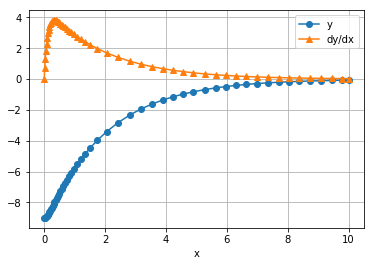

In [6]:
# Hlm 279
import numpy as np
import matplotlib.pyplot as plt
from run_kut5 import *
from printSoln import *
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -4.75*y[0] - 10.0*y[1]
    return F
x = 0.0
xStop = 10.0
y = np.array([-9.0, 0.0])
h = 0.1
freq = 4
X,Y = integrate(F,x,y,xStop,h)
printSoln(X,Y,freq)
plt.plot(X,Y[:,0],'o-',X,Y[:,1],'^-')
plt.xlabel('x')
plt.legend(('y','dy/dx'),loc=0)
plt.grid(True)
plt.show()

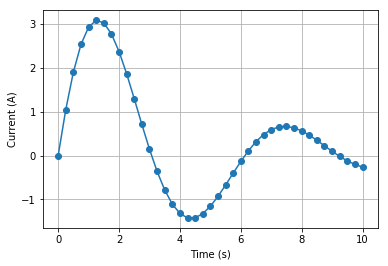

In [16]:
# Hlm 286
from bulStoer import *
import numpy as np
import matplotlib.pyplot as plt

def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] =(-y[1] - y[0]/0.45 + 9.0)/2.0
    return F

H = 0.25
xStop = 10.0
x = 0.0
y = np.array([0.0, 0.0])
X,Y = bulStoer(F,x,y,xStop,H)
plt.plot(X,Y[:,1],'o-')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()